In [2]:
%matplotlib inline

from math import cos, sin, atan, sqrt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
class Complex:
    
# classe que vai definir números complexos e as operações necessárias entre eles
                                                                                                  
        def __init__(self,x,y):
                self.re = x
                self.im = y

        def soma(self, other):
                return Complex(self.re + other.re , self.im + other.im)

        def subs(self,other):
                return Complex(self.re - other.re , self.im - other.im)

        def mult(self,other):
                return Complex(self.re*other.re - self.im*other.im,
                                self.re*other.im + self.im*other.re )
        def abs(self):
                return (self.re**2 + self.im**2)**0.5

        def __repr__(self):
                return '(%f, %f)' %(self.re, self.im)
            
        def angle(self):
            return atan(self.im / self.re)
        
        
# Definindo as constantes que serão utilizadas em todos os exercícios
L = 1000                    # indutância
C = 1 / 1000                # capacitancia
OMEGA = 2 / sqrt(L * C)   # frequencia angular do meu circuito


In [4]:
# Definindo funções que serão utilizadas em todos os exercícios

# Função que calcula a voltagem para um determinado tempo(t) e retorna um objeto da classe Complex
def voltagem(t):
    return Complex(cos(OMEGA * t), -sin(OMEGA * t))

# Função que calcula a corrente para um determinado tempo(t), um dado valor absoluto de impedância e um determinado 
# ângulo THETA  da impedância, e devolve um objeto da classe Complex
def corrente(t, z, THETA):
    return Complex((1/ z) * cos(OMEGA * t + THETA), (1/ z) * sin(OMEGA * t + THETA))

# Função que calcula a impedância de um circuito para diferentes valores de resistência e retorna um
# objeto da classe Complex
def impedancia(R, omega, l):
    return Complex(R, (1 / (omega * C)) - omega * l )

Text(0.5,0,'Tempo (s)')

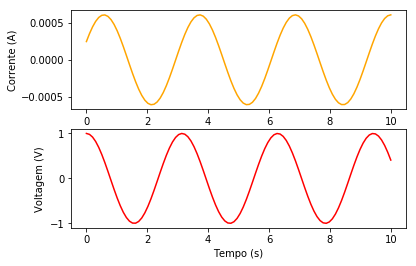

In [5]:
# Exercício 1

# definindo a constante necessária para esse exercício
R = 1000 / 1.5 
cplxImpedancia = impedancia(R, OMEGA, L)

# definindo os passos no tempo
time = np.linspace(0, 10, 100)

# definindo minhas listas necessárias para um futuro plot
listCorrente = []
listVoltagem = []

# iniciando meu loop para calcular os valores de corrente e voltagem em diferentes instantes de tempo e 
# poder guarda-los nas minhas listas 
for t in time:  
    cplxVoltagem = voltagem(t)
    listVoltagem.append(cplxVoltagem.re)  # apenas a parte real me interessa
    
    cplxCorrente = corrente(t, cplxImpedancia.abs(), cplxImpedancia.angle())
    listCorrente.append(cplxCorrente.re)
    
# agora irei fazer meus plots

plt.subplot(2, 1, 1)
plt.plot(time, listCorrente, color='orange')
plt.ylabel('Corrente (A)')
plt.xlabel('Tempo (s)')

plt.subplot(2, 1, 2)
plt.plot(time, listVoltagem, color='red')
plt.ylabel('Voltagem (V)')
plt.xlabel('Tempo (s)')

A frequência de ressonância para R = 1000/1.5 é  1.00202020202 Hz
A frequência de ressonância para R = 1000/2.0 é  1.00202020202 Hz
A frequência de ressonância para R = 1000/5.2 é  1.00202020202 Hz


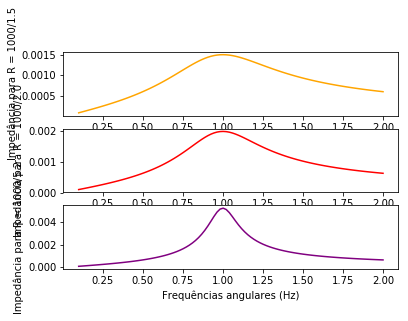

In [9]:
# Exercício 2

# definindo as constantes necessárias para esse exercício
listResistencias = [1000/ 1.5, 1000 / 2, 1000/ 5.2]

# definindo minhas listas para um futuro plot
listOmega = np.linspace(0.1, OMEGA, 100)
listImpedancia = [[], [], []]  # crio uma lista de listas para poder calcular com apenas um for

# calculando minha lista para impedancia usando os valores de omega e R1 
for i in range(len(listResistencias)):
    for w in listOmega:
        cplxImpedancia = impedancia(listResistencias[i], w, L)
        listImpedancia[i].append(1 / cplxImpedancia.abs())  # estou interessada em 1/valor absoluto da impedancia
        
# fazendo meus plots
plt.subplot(3, 1, 1)
plt.plot(listOmega, listImpedancia[0], color='orange')
plt.xlabel('Frequências angulares (Hz)')
plt.ylabel('Impedância para R = 1000/1.5')

plt.subplot(3, 1, 2)
plt.plot(listOmega, listImpedancia[1], color='red')
plt.xlabel('Frequências angulares (Hz)')
plt.ylabel('Impedância para R = 1000/2.0')

plt.subplot(3, 1, 3)
plt.plot(listOmega, listImpedancia[2], color='purple')
plt.xlabel('Frequências angulares (Hz)')
plt.ylabel('Impedância para R = 1000/5.2')


# procurando as frequencias de ressonancia
imped1 = np.max(listImpedancia[0])
imped2 = np.max(listImpedancia[1])
imped3 = np.max(listImpedancia[2])

# encontrando as frequencias para os modulos de impedancia maximos encontrados a partir do index do valor
# maximo de impedancia
freq1 = listOmega[listImpedancia[0].index(imped1)]
freq2 = listOmega[listImpedancia[1].index(imped2)]
freq3 = listOmega[listImpedancia[2].index(imped3)]


# printando meus resultados
print('A frequência de ressonância para R = 1000/1.5 é ', freq1, 'Hz')
print('A frequência de ressonância para R = 1000/2.0 é ', freq2, 'Hz')
print('A frequência de ressonância para R = 1000/5.2 é ', freq3, 'Hz')

Text(0,0.5,'Ângulo para R = 1000/5.2')

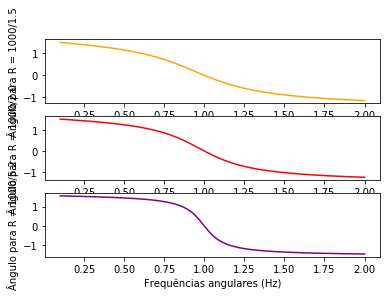

In [7]:
# Exercício 3

# definindo as listas necessárias para o exercício
listTheta = [[], [], []]

# fazendo o loop para poder calcular o angulo theta para cada uma das impedancias possiveis
for i in range(len(listResistencias)):
    for w in listOmega:
        cplxImpedancia = impedancia(listResistencias[i], w, L)
        listTheta[i].append(cplxImpedancia.angle())

# fazendo meus plots
plt.subplot(3, 1, 1)
plt.plot(listOmega, listTheta[0], color='orange')
plt.xlabel('Frequências angulares (Hz)')
plt.ylabel('Ângulo para R = 1000/1.5')

plt.subplot(3, 1, 2)
plt.plot(listOmega, listTheta[1], color='red')
plt.xlabel('Frequências angulares (Hz)')
plt.ylabel('Ângulo para R = 1000/2.0')

plt.subplot(3, 1, 3)
plt.plot(listOmega, listTheta[2], color='purple')
plt.xlabel('Frequências angulares (Hz)')
plt.ylabel('Ângulo para R = 1000/5.2')

O valor de L no qual o circuito é ressonante é  444.444444444 Henry


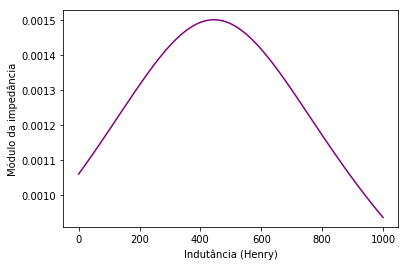

In [10]:
# Exercício 4

# definindo as constantes para o exercício
omega = 1.5
R = 1000 / 1.5

# definindo minhas listas para o exercicio
listIndutancia = np.linspace(0, 1000, 100)
listModuloImpedancia = []

# inciando o loop para calular os valores de impedancia para diferentes indutancias
for i in listIndutancia:
    cplxImpedancia = impedancia(R, omega, i)
    listModuloImpedancia.append(1 / cplxImpedancia.abs())
    
# fazendo meus plots
plt.plot(listIndutancia, listModuloImpedancia, color='purple')
plt.xlabel('Indutância (Henry)')
plt.ylabel('Módulo da impedância')

# procurando a indutancia na qual o circuito é ressonante
impedanciaMax = np.max(listModuloImpedancia)
indutanciaMax = listIndutancia[listModuloImpedancia.index(impedanciaMax)]

print('O valor de L no qual o circuito é ressonante é ', indutanciaMax, 'Henry')